In [3]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4393402 sha256=1a9698371faf6ca1846f2f06d5392c70e4f650921ea577084ee67726f4f94368
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [284]:
import fasttext
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
cd /content/drive/MyDrive/курсова

/content/drive/MyDrive/курсова


In [77]:
ls

 cc.pl.300.bin                    pl.txt
 cc.uk.300.bin                    __pycache__/
 cognates.csv                     tyhrolovy_vecs.bin
 cognates.py                      ukr_pol_ds.py
'Copy of word_embeddings.ipynb'   ukr_pol.py
 dataset.csv                      uk.txt
 event_log.txt                    updated_dataset.csv
 false-friends_sp-pr.pdf          wiki.pl.vec
 fast_vector.py                   wiki.uk.vec
 main.ipynb                       word_embeddings.ipynb
 modified.csv


In [8]:
!cp drive/MyDrive/курсова/fast_vector.py

cp: missing destination file operand after 'drive/MyDrive/курсова/fast_vector.py'
Try 'cp --help' for more information.


## Filter dataset for words predicted as homographs

In [218]:
df = pd.read_csv('updated_dataset.csv')

In [220]:
filtered_df = df[df['predictions']==1]
filtered_df

,Unnamed: 0,id,pl,uk,false_friends,orthographic_sim,predictions
0,0,1,śniadanie,сніданок,0,1,1
1,1,2,wegetarianin,вегетаріанський,0,1,1
2,2,3,napój,напій,0,1,1
3,3,4,kawa,кава,0,1,1
4,4,5,sok,сік,0,1,1
...,...,...,...,...,...,...,...
749,802,803,szesnaście,козаки,2,0,1
752,806,807,malarz,магазинчик,2,0,1
756,812,813,strata,порадувати,2,0,1
801,864,865,kolejny,лужний,2,0,1


In [222]:
grouped_counts = filtered_df.groupby('false_friends').count()
print(grouped_counts)

               Unnamed: 0   id   pl   uk  orthographic_sim  predictions
false_friends                                                          
0                     165  165  165  165               165          165
1                     193  193  193  193               193          193
2                      24   24   24   24                24           24


In [236]:
filtered_df['uk'] = filtered_df['uk'].str.strip()
filtered_df['pl'] = filtered_df['pl'].str.strip()
print(len(filtered_df))

382


<ipython-input-236-67ae1a4f2295>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['uk'] = filtered_df['uk'].str.strip()
<ipython-input-236-67ae1a4f2295>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['pl'] = filtered_df['pl'].str.strip()


In [231]:
df = pd.read_csv('updated_dataset.csv')
filtered_df = df[df['predictions']==1]

In [232]:
filtered_df

,Unnamed: 0,id,pl,uk,false_friends,orthographic_sim,predictions
0,0,1,śniadanie,сніданок,0,1,1
1,1,2,wegetarianin,вегетаріанський,0,1,1
2,2,3,napój,напій,0,1,1
3,3,4,kawa,кава,0,1,1
4,4,5,sok,сік,0,1,1
...,...,...,...,...,...,...,...
749,802,803,szesnaście,козаки,2,0,1
752,806,807,malarz,магазинчик,2,0,1
756,812,813,strata,порадувати,2,0,1
801,864,865,kolejny,лужний,2,0,1


In [233]:
filtered_df['false_friends'] = filtered_df['false_friends'].replace({2:0})

<ipython-input-233-e0e89cd8d4d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['false_friends'] = filtered_df['false_friends'].replace({2:0})


In [234]:
grouped_counts = filtered_df.groupby('false_friends').count()
grouped_counts

,Unnamed: 0,id,pl,uk,orthographic_sim,predictions
false_friends,,,,,,
0,189,189,189,189,189,189
1,193,193,193,193,193,193


In [304]:
row_count = filtered_df['false_friends'].value_counts()
row_count

1    193
0    189
Name: false_friends, dtype: int64

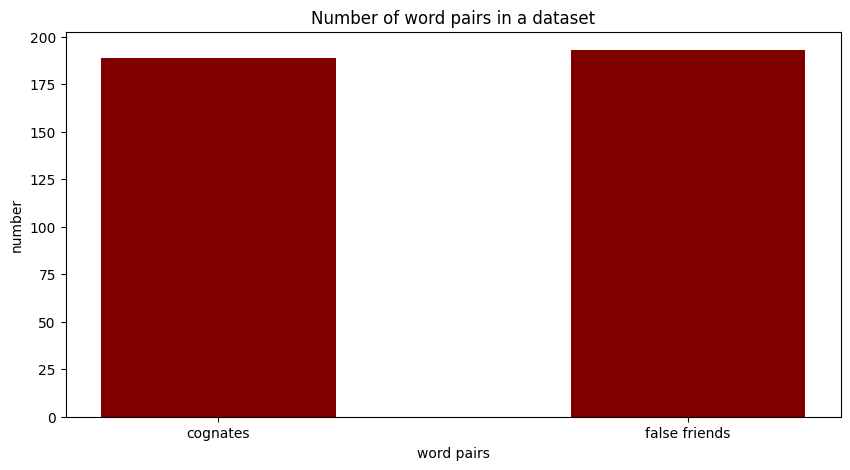

In [305]:
indeces = ['cognates', 'false friends']

values = sorted(list(row_count.values))

fig = plt.figure(figsize=(10,5))

plt.bar(indeces, values, color='maroon', width=0.5)

plt.xlabel("word pairs")
plt.ylabel("number")
plt.title("Number of word pairs in a filtered dataset")
plt.show()

## Similarity between Ukrainian and Polish word pairs

In [15]:
from fast_vector import FastVector
uk_dictionary = FastVector(vector_file='wiki.uk.vec')
pl_dictionary = FastVector(vector_file='wiki.pl.vec')

reading word vectors from wiki.uk.vec
reading word vectors from wiki.pl.vec


In [16]:
uk_vector = uk_dictionary["кіт"]
pl_vector = pl_dictionary["kot"]
print(FastVector.cosine_similarity(uk_vector, pl_vector))

0.09863913206925096


In [17]:
uk_dictionary.apply_transform('uk.txt')
pl_dictionary.apply_transform('pl.txt')

In [306]:
print(FastVector.cosine_similarity(uk_dictionary["кіт"], pl_dictionary["kot"]))
# Result should be 0.43

0.48332476480896835


## Predict cognates and false friends

In [297]:
preds = []

for row in filtered_df.iterrows():
  uk_word = row[1][3]
  pl_word = row[1][2]
  res = FastVector.cosine_similarity(uk_dictionary[uk_word], pl_dictionary[pl_word])
  # false friends
  if res < 0.5:
    preds.append(1)
  else:
    preds.append(0)


In [298]:
print(preds)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 

In [299]:
y_true = filtered_df['false_friends'].to_list()

In [300]:
print(y_true)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [301]:
print(classification_report(y_true, preds))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       189
           1       0.79      0.87      0.83       193

    accuracy                           0.82       382
   macro avg       0.82      0.82      0.82       382
weighted avg       0.82      0.82      0.82       382



In [302]:
matrix = confusion_matrix(y_true, preds)

[Text(0, 0.5, 'cognates'), Text(0, 1.5, 'false friends')]

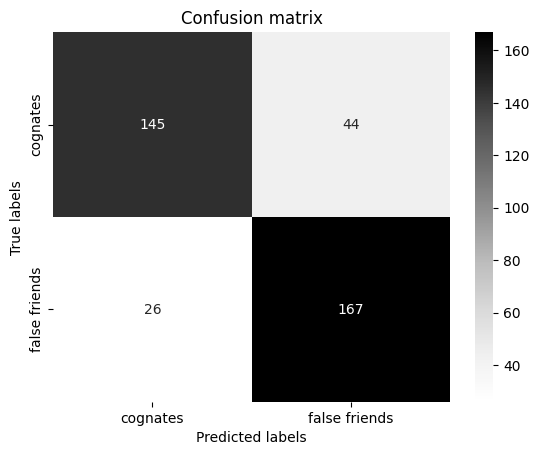

In [303]:
ax = plt.subplot()
sns.heatmap(matrix,annot=True,fmt='.0f',cmap='Greys')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['cognates', 'false friends'])
ax.yaxis.set_ticklabels(['cognates', 'false friends'])

## Loading language vectors

In [ ]:
# Ukrainian language model

model_uk = fasttext.load_model('cc.uk.300.bin')

In [ ]:
# Polish language model

model_pl = fasttext.load_model('cc.pl.300.bin')

## Vector exploration

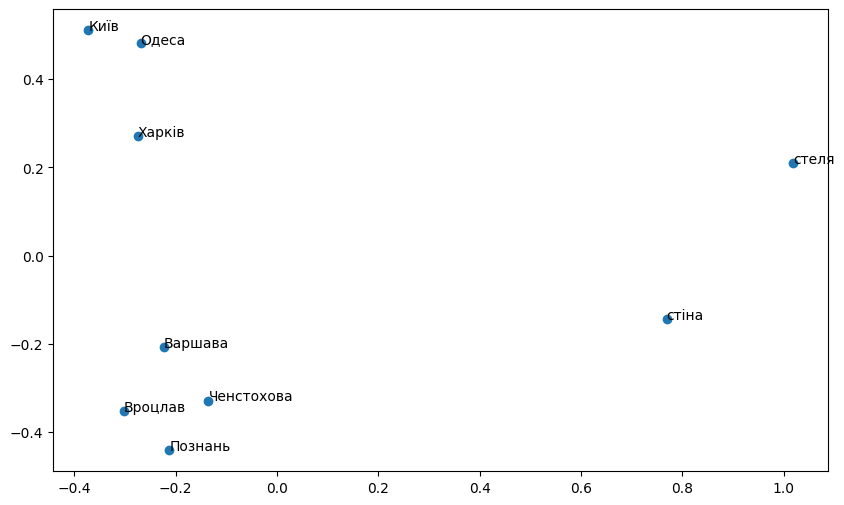

In [ ]:
uk_vectors = ["Варшава", "Познань", "Одеса", "Харків", "Вроцлав","Ченстохова", "Київ", "стіна", "стеля"]

word_vectors_subset = [model_uk.get_word_vector(word) for word in uk_vectors]

# Perform dimensionality reduction
pca = PCA(n_components=2)  # Change to 3 for 3D visualization
word_vectors_2d = pca.fit_transform(word_vectors_subset)

# Create a scatter plot of the word vectors
plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])


# Add labels for each word
for i, word in enumerate(uk_vectors):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

# Show the plot
plt.show()

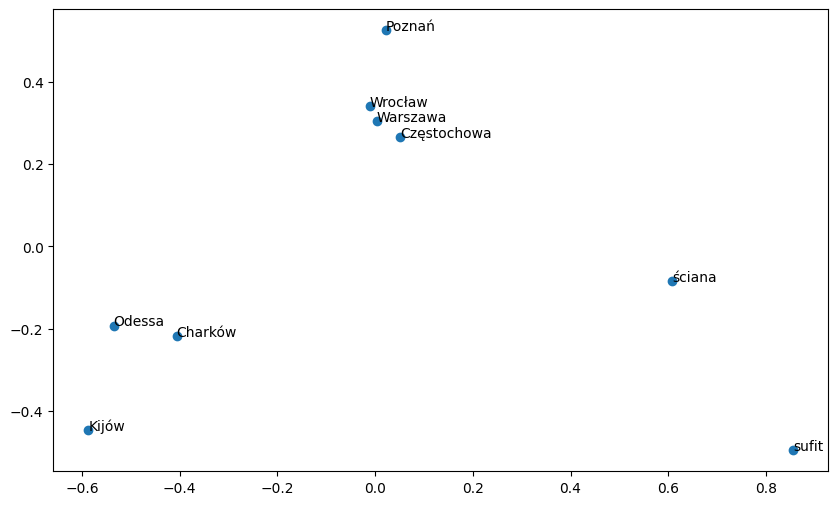

In [ ]:
pl_vectors = ['Kijów', 'Charków', 'Odessa', 'Warszawa', 'Wrocław', 'Częstochowa', 'Poznań', 'ściana', 'sufit']


word_vectors_subset = [model_pl.get_word_vector(word) for word in pl_vectors]

# Perform dimensionality reduction
pca = PCA(n_components=2)  # Change to 3 for 3D visualization
word_vectors_2d = pca.fit_transform(word_vectors_subset)

# Create a scatter plot of the word vectors
plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])


# Add labels for each word
for i, word in enumerate(pl_vectors):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

# Show the plot
plt.show()

In [ ]:
model_pl.get_nearest_neighbors('Tarnopol', k=20)

[(0.6619117259979248, 'Tarnopo'),
 (0.6609591841697693, 'Tarnopolskie'),
 (0.6594625115394592, 'Tarnopolski'),
 (0.6581240296363831, 'TarnopolNywa'),
 (0.6484225392341614, 'Lwów'),
 (0.6367254853248596, 'Żytomierz'),
 (0.6298438906669617, 'tarnopolski'),
 (0.6296219229698181, 'TarnopolFK'),
 (0.6280732154846191, 'Tarnopolskim'),
 (0.6194287538528442, 'Tarnopola'),
 (0.6168087124824524, 'WęgryTarnopol'),
 (0.61272794008255, 'Tarnopolu'),
 (0.6102651953697205, 'Brzeżany'),
 (0.6044431328773499, 'Rohatyn'),
 (0.59547358751297, 'Tarnopolskiem'),
 (0.5941257476806641, 'Złoczów'),
 (0.5906077027320862, 'Tarnopolska'),
 (0.5902125239372253, 'tarnopolskie'),
 (0.5867614150047302, 'Podhajce'),
 (0.5865432620048523, 'Żydaczów')]

In [ ]:
model_uk.get_word_vector('машина').shape

(300,)

In [ ]:
model_uk.get_analogies('Варшава', 'Польща', 'Україна')

[(0.6110314130783081, 'Київ'),
 (0.6055029630661011, 'Москва'),
 (0.5506971478462219, 'Одеса'),
 (0.5502026081085205, 'Київ-Варшава'),
 (0.539129912853241, 'Харків-Варшава'),
 (0.5382523536682129, 'Київ-Нью-Йорк'),
 (0.5381291508674622, 'Львів-Варшава'),
 (0.5311408638954163, 'Європа'),
 (0.529330849647522, 'Україна2'),
 (0.5263713598251343, 'Київ-Прага')]

In [ ]:
model_uk.get_analogies('Київ', 'Україна', 'Японія')

[(0.6316195130348206, 'Токіо'),
 (0.5954586863517761, 'Кіото'),
 (0.5291852951049805, 'Токіо-Наріта'),
 (0.5268515348434448, 'Япон'),
 (0.5254097580909729, 'Хамамацу'),
 (0.5220339298248291, 'Нагоя'),
 (0.520989179611206, 'Кітакюсю'),
 (0.5202122330665588, 'Японіі'),
 (0.519186794757843, 'Токіомі'),
 (0.5158222913742065, 'Кобе')]